# Consumer complaints classification 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing,linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [48]:
# loading dataset
dataset=pd.read_csv("consumer_complaints.csv")

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
dataset.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [50]:
dataset.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [51]:
# taking only two columns
dataset=dataset[["product","consumer_complaint_narrative"]]

In [52]:
#removing null values
dataset = dataset[pd.notnull(dataset['consumer_complaint_narrative'])]

In [53]:
dataset.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [54]:
# Factorizing the category column
dataset['category_id'] = dataset['product'].factorize()[0]
dataset.head(10)

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2
190237,Mortgage,Experian is reporting my OPEN and CURRENT Mort...,2
190238,Mortgage,This complaint is against Wells Fargo Bank for...,2
190251,Mortgage,I spoke to XXXX of green tree representatives ...,2
190263,Credit card,i opened XXXX Bank of America credit cards 15-...,3
190264,Consumer Loan,I applied for a loan with XXXX XXXX and had pu...,1


In [55]:
# grouping the complaints and count total numbers
dataset.groupby("product").consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

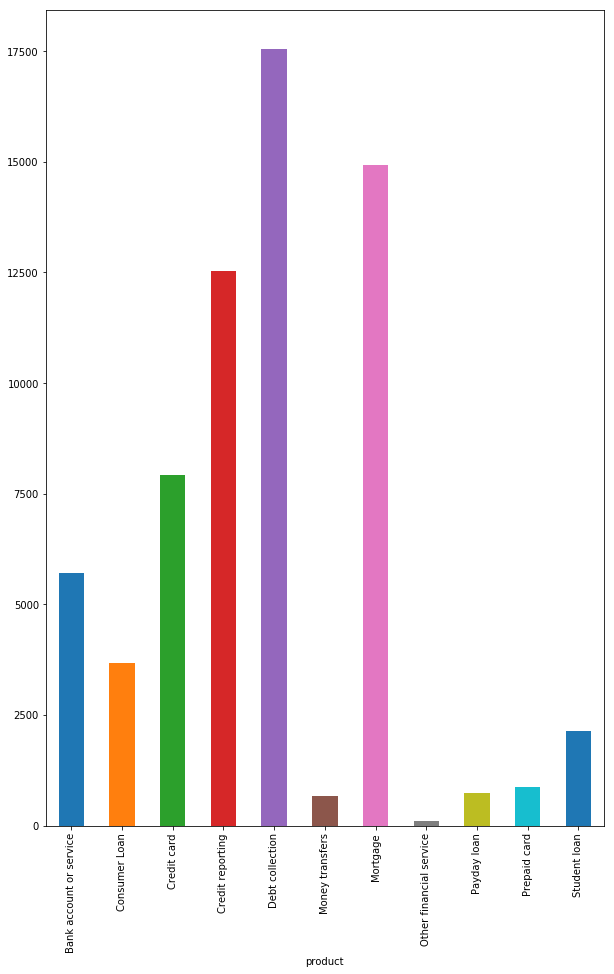

In [56]:
plt.figure(figsize=(10,15))
dataset.groupby("product").consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

#### debt collection and mortgage have highest number of complaints registered

In [57]:
#Spliting the data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataset['consumer_complaint_narrative'], dataset['product'])

## Feature engineering using TF-IDF

In [58]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(dataset['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

## Model building and evaluation

In [59]:

model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

In [60]:
# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs=1,penalty='l2', random_state=None, solver='liblinear',tol=0.0001,verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
# checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)

In [62]:
accuracy

0.847144054604239

In [63]:
# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),target_names=dataset['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.80      0.81      1447
          Consumer Loan       0.78      0.57      0.66       894
               Mortgage       0.81      0.83      0.82      1994
            Credit card       0.86      0.86      0.86      3114
       Credit reporting       0.82      0.89      0.85      4340
           Student loan       0.86      0.44      0.58       188
Bank account or service       0.92      0.95      0.93      3765
            Payday loan       0.00      0.00      0.00        23
        Money transfers       0.69      0.28      0.39       160
Other financial service       0.80      0.54      0.65       218
           Prepaid card       0.89      0.74      0.81       559

            avg / total       0.84      0.85      0.84     16702



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# confusion matrix
conf_mat = metrics.confusion_matrix(valid_y, model.predict(xvalid_tfidf))

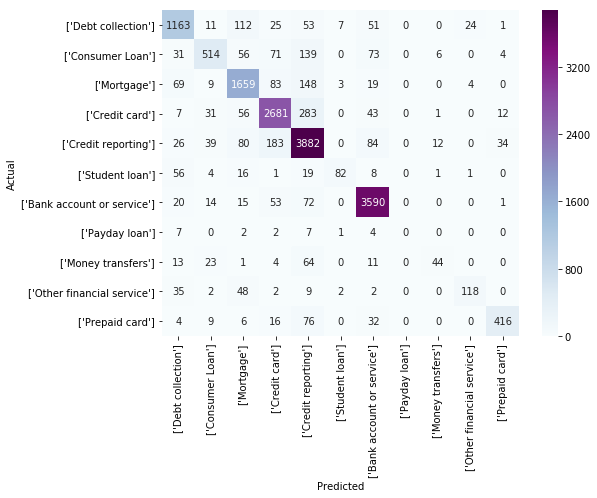

In [65]:
# Vizualising confusion matrix
category_id_df = dataset[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",xticklabels=category_id_df[['product']].values,yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### The accuracy of 85% is good for a baseline model. Precision and recalllook pretty good across the categories except for “Payday loan.” If you lookfor Payload loan, most of the wrong predictions are Debt collection andCredit card, which might be because of the smaller number of samples inthat category. It also sounds like it’s a subcategory of a credit card.

#### Let predicting examples

In [68]:
text1=["'XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n'"]

In [69]:
text2=["Experian is reporting my OPEN and CURRENT Mortgage loan with XXXX as XXXX in BK. XXXX is reporting the monthly payments but Experian is supressing the information and refuses to accurately report the payments and show the account is Open. This debt was Officially reinstated in a Chapter XXXX BK. This is NOT a Chapter XXXX BK and Experian has no legal right to not rport the current status of this mortgage \n"]

In [70]:
text3=["XXXX was submitted XX/XX/XXXX. At the time I submitted this complaint, I had dealt with Rushmore Mortgage directly endeavoring to get them to stop the continuous daily calls I was receiving trying to collect on a mortgage for which I was not responsible due to bankruptcy. They denied having knowledge of the bankruptcy, even though I had spoken with them about it repeatedly and had written them repeatedly referencing the bankruptcy requesting them to cease the pursuit, they continued to do so. When they were unable to trick me into paying, force me into paying in retaliation they placed reported to my credit bureaus a past due mortgage amount that had been discharged in Federal Court. On XX/XX/XXXX Rushmore responded the referenced complaint indicating that they would remove the reporting from my bureau, yet it is still there now in XX/XX/XXXX. I would like them to remove it immediately and send me a letter indicating that it should not have been there in the first place and they are going to remove it from all my bureaus. Rushmore, when speaking to me, represented themselves as the new note holder, but when CFPB was involved, they identified themselves as the servicing agency for XXXX XXXX XXXX. This credit bullying and racial discrimination practices is damaging to anyone who is exposed to these tactics and this needs to stop. Them denying their intent and then walking away with no penalties of any kind is one of the reasons it continues. Please assist me in procuring the resolution once and for all"]

In [71]:
print(text1)
print(" - Predicted as: '{}'".format(id_to_category[model.predict(tfidf_vect.transform(text1))[0]]))

["'XXXX has claimed I owe them {$27.00} for XXXX years despite the PROOF of PAYMENT I sent them : canceled check and their ownPAID INVOICE for {$27.00}! \nThey continue to insist I owe them and collection agencies are after me. \nHow can I stop this harassment for a bill I already paid four years ago? \n'"]
 - Predicted as: 'Credit reporting'


In [72]:
print(text2)
print(" - Predicted as: '{}'".format(id_to_category[model.predict(tfidf_vect.transform(text2))[0]]))

['Experian is reporting my OPEN and CURRENT Mortgage loan with XXXX as XXXX in BK. XXXX is reporting the monthly payments but Experian is supressing the information and refuses to accurately report the payments and show the account is Open. This debt was Officially reinstated in a Chapter XXXX BK. This is NOT a Chapter XXXX BK and Experian has no legal right to not rport the current status of this mortgage \n']
 - Predicted as: 'Credit card'


In [73]:
print(text3)
print(" - Predicted as: '{}'".format(id_to_category[model.predict(tfidf_vect.transform(text3))[0]]))

['XXXX was submitted XX/XX/XXXX. At the time I submitted this complaint, I had dealt with Rushmore Mortgage directly endeavoring to get them to stop the continuous daily calls I was receiving trying to collect on a mortgage for which I was not responsible due to bankruptcy. They denied having knowledge of the bankruptcy, even though I had spoken with them about it repeatedly and had written them repeatedly referencing the bankruptcy requesting them to cease the pursuit, they continued to do so. When they were unable to trick me into paying, force me into paying in retaliation they placed reported to my credit bureaus a past due mortgage amount that had been discharged in Federal Court. On XX/XX/XXXX Rushmore responded the referenced complaint indicating that they would remove the reporting from my bureau, yet it is still there now in XX/XX/XXXX. I would like them to remove it immediately and send me a letter indicating that it should not have been there in the first place and they are 